# Setup

Allows for Google Colab to access Drive Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Installs requirements for dask dataframe and rocket model

In [ ]:
!pip install dask[dataframe]
#!pip install --upgrade numba
#!pip install sktime

     |████████████████████████████████| 112kB 8.9MB/s 


Loads in all data as 1 pandas dataframe (usually take a bit to execute)

In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import time
file = '/content/drive/MyDrive/parsed_adsb_csvs_types/*.csv'
#file = '/content/drive/MyDrive/testtest/parsed_adsb_csvs_types-20210407T164239Z-001.zip (Unzipped Files)/parsed_adsb_csvs_types/*.csv'
#file = '/content/drive/MyDrive/testtest/*.csv'
cols = ['Icao','Alt', 'Lat','Long', 'PosTime', 'Type']
# read data frame from csv files
train_df = dd.read_csv(file, dtype = {'Alt': 'uint16', 'Lat': 'float32', 'Long': 'float32', 'PosTime': 'int64'}, usecols = cols) 

train_df = train_df.compute()
print(train_df)

         Icao    Alt        Lat        Long        PosTime  Type
0      A82B72   3500  39.717903  -84.619019  1596672029381  C172
1      A80E46  31000  61.336498 -140.995438  1596672028022  B748
2      A4E2E5    700  42.145557  -72.719398  1596672029830  C140
3      A4BDB9  15600  33.516727  -79.442421  1596672029378  E170
4      A4C3CE    650  32.965118  -96.833878  1596672030885  CRUZ
...       ...    ...        ...         ...            ...   ...
21531  C821F8  17975 -41.125225  175.051468  1596758412576  AT76
21532  C8234A  18500 -37.852840  174.806625  1596758411374  A320
21533  ACC040  28000  42.272324  -87.846115  1596758411880  CRJ9
21534  A7D222   6900  29.646700  -98.126343  1596757702853  BE36
21535  345292  32000  51.857941    5.114062  1596758411877  B734

[29550434 rows x 6 columns]


Arrange in order of the Icao number

In [ ]:

train_df = train_df.sort_values(by=['Icao', 'PosTime'])
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao   Alt        Lat       Long        PosTime  Type
0         001000  2175  48.106934  11.258926  1596721377840  SIRA
1         001000  2175  48.106934  11.258926  1596721392353  SIRA
2         001000  2175  48.106934  11.258926  1596721394847  SIRA
3         001000  2175  48.109818  11.264557  1596721444191  SIRA
4         001000  2175  48.105652  11.257416  1596721470866  SIRA
...          ...   ...        ...        ...            ...   ...
29550429  F00000   450  49.149822   2.394817  1596742711592  SKRA
29550430  F00000   300  49.149822   2.394817  1596742711592  SKRA
29550431  F00000   200  49.149822   2.394817  1596742711592  SKRA
29550432  F00000   175  49.149822   2.394817  1596742711592  SKRA
29550433  F00000   175  49.149822   2.394817  1596742711592  SKRA

[29550434 rows x 6 columns]


Perform min- max normalization

In [ ]:
max_lat = train_df['Lat'].max()
min_lat = train_df['Lat'].min()
max_lon = train_df['Long'].max()
min_lon = train_df['Long'].min()
max_alt = train_df['Alt'].max()
min_alt = train_df['Alt'].min()


train_df['Lat'] = (train_df['Lat']- min_lat) / (max_lat - min_lat)
train_df['Long'] = (train_df['Long']- min_lon) / (max_lon - min_lon)
train_df['Alt'] = (train_df['Alt']- min_alt) / (max_alt - min_alt)
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
0         001000  0.033188  0.844904  0.531295  1596721377840  SIRA
1         001000  0.033188  0.844904  0.531295  1596721392353  SIRA
2         001000  0.033188  0.844904  0.531295  1596721394847  SIRA
3         001000  0.033188  0.844915  0.531311  1596721444191  SIRA
4         001000  0.033188  0.844899  0.531291  1596721470866  SIRA
...          ...       ...       ...       ...            ...   ...
29550429  F00000  0.006867  0.848767  0.506672  1596742711592  SKRA
29550430  F00000  0.004578  0.848767  0.506672  1596742711592  SKRA
29550431  F00000  0.003052  0.848767  0.506672  1596742711592  SKRA
29550432  F00000  0.002670  0.848767  0.506672  1596742711592  SKRA
29550433  F00000  0.002670  0.848767  0.506672  1596742711592  SKRA

[29550434 rows x 6 columns]


Get percentage of Vessel Types in data frame

In [ ]:

print(train_df['Type'].value_counts(normalize=True) * 100)

Percentages = train_df['Type'].value_counts(normalize=True) * 100
print(Percentages.head(25))
print(Percentages[:50].sum())
print(list(Percentages[:50].index))

B738    12.082537
A320     8.034159
C172     5.748447
A321     3.897489
B737     3.358540
          ...    
G300     0.000037
E314     0.000037
A337     0.000017
PTSS     0.000010
WACN     0.000010
Name: Type, Length: 859, dtype: float64
B738    12.082537
A320     8.034159
C172     5.748447
A321     3.897489
B737     3.358540
A319     2.872411
P28A     2.810757
A20N     2.338856
B763     1.780898
B739     1.546363
E75L     1.538011
B752     1.344224
B789     1.197722
B773     1.141442
CRJ9     1.021809
B77L     1.012435
C182     0.978436
PC12     0.959624
E190     0.874617
C208     0.808472
B744     0.801027
A333     0.786411
A21N     0.783004
BE20     0.764100
E170     0.752141
Name: Type, dtype: float64
71.76295955585626
['B738', 'A320', 'C172', 'A321', 'B737', 'A319', 'P28A', 'A20N', 'B763', 'B739', 'E75L', 'B752', 'B789', 'B773', 'CRJ9', 'B77L', 'C182', 'PC12', 'E190', 'C208', 'B744', 'A333', 'A21N', 'BE20', 'E170', 'CRJ7', 'A359', 'DA40', 'C152', 'SR22', 'A306', 'CRJ2', 'C56X', 'A

# Setup (For x,y,z coordinates)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install dask[dataframe]

In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import time

#file = '/content/drive/MyDrive/parsed_adsb_csvs_types/*.csv'
file = '/content/drive/MyDrive/testtest/parsed_adsb_csvs_types-20210407T164239Z-001.zip (Unzipped Files)/parsed_adsb_csvs_types/*.csv'
cols = ['Icao','Alt', 'Lat','Long', 'PosTime', 'Type']
# read data frame from csv files
train_df = dd.read_csv(file, dtype = {'Alt': 'uint16', 'Lat': 'float32', 'Long': 'float32', 'PosTime': 'int64'}, usecols = cols) 

train_df = train_df.compute()
print(train_df)

         Icao    Alt        Lat        Long        PosTime  Type
0      A82B72   3500  39.717903  -84.619019  1596672029381  C172
1      A80E46  31000  61.336498 -140.995438  1596672028022  B748
2      A4E2E5    700  42.145557  -72.719398  1596672029830  C140
3      A4BDB9  15600  33.516727  -79.442421  1596672029378  E170
4      A4C3CE    650  32.965118  -96.833878  1596672030885  CRUZ
...       ...    ...        ...         ...            ...   ...
21531  C821F8  17975 -41.125225  175.051468  1596758412576  AT76
21532  C8234A  18500 -37.852840  174.806625  1596758411374  A320
21533  ACC040  28000  42.272324  -87.846115  1596758411880  CRJ9
21534  A7D222   6900  29.646700  -98.126343  1596757702853  BE36
21535  345292  32000  51.857941    5.114062  1596758411877  B734

[29550434 rows x 6 columns]


In [ ]:
#Arrange in order of the Icao number
train_df = train_df.sort_values(by=['Icao', 'PosTime'])
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao   Alt        Lat       Long        PosTime  Type
0         001000  2175  48.106934  11.258926  1596721377840  SIRA
1         001000  2175  48.106934  11.258926  1596721392353  SIRA
2         001000  2175  48.106934  11.258926  1596721394847  SIRA
3         001000  2175  48.109818  11.264557  1596721444191  SIRA
4         001000  2175  48.105652  11.257416  1596721470866  SIRA
...          ...   ...        ...        ...            ...   ...
29550429  F00000   450  49.149822   2.394817  1596742711592  SKRA
29550430  F00000   300  49.149822   2.394817  1596742711592  SKRA
29550431  F00000   200  49.149822   2.394817  1596742711592  SKRA
29550432  F00000   175  49.149822   2.394817  1596742711592  SKRA
29550433  F00000   175  49.149822   2.394817  1596742711592  SKRA

[29550434 rows x 6 columns]


In [ ]:

max_alt = train_df['Alt'].max()
min_alt = train_df['Alt'].min()

#perform min- max normalization

train_df['Alt'] = (train_df['Alt']- min_alt) / (max_alt - min_alt)
print(train_df)

            Icao       Alt        Lat       Long        PosTime  Type
0         001000  0.033188  48.106934  11.258926  1596721377840  SIRA
1         001000  0.033188  48.106934  11.258926  1596721392353  SIRA
2         001000  0.033188  48.106934  11.258926  1596721394847  SIRA
3         001000  0.033188  48.109818  11.264557  1596721444191  SIRA
4         001000  0.033188  48.105652  11.257416  1596721470866  SIRA
...          ...       ...        ...        ...            ...   ...
29550429  F00000  0.006867  49.149822   2.394817  1596742711592  SKRA
29550430  F00000  0.004578  49.149822   2.394817  1596742711592  SKRA
29550431  F00000  0.003052  49.149822   2.394817  1596742711592  SKRA
29550432  F00000  0.002670  49.149822   2.394817  1596742711592  SKRA
29550433  F00000  0.002670  49.149822   2.394817  1596742711592  SKRA

[29550434 rows x 6 columns]


In [ ]:
#Get percentage of Vessel Types in each data frame
print(train_df['Type'].value_counts(normalize=True) * 100)

B738    12.082537
A320     8.034159
C172     5.748447
A321     3.897489
B737     3.358540
          ...    
E314     0.000037
G300     0.000037
A337     0.000017
PTSS     0.000010
WACN     0.000010
Name: Type, Length: 859, dtype: float64


In [ ]:
Percentages = train_df['Type'].value_counts(normalize=True) * 100
print(Percentages.head(25))
print(Percentages[:25].sum())
print(list(Percentages[:25].index))

B738    12.082537
A320     8.034159
C172     5.748447
A321     3.897489
B737     3.358540
A319     2.872411
P28A     2.810757
A20N     2.338856
B763     1.780898
B739     1.546363
E75L     1.538011
B752     1.344224
B789     1.197722
B773     1.141442
CRJ9     1.021809
B77L     1.012435
C182     0.978436
PC12     0.959624
E190     0.874617
C208     0.808472
B744     0.801027
A333     0.786411
A21N     0.783004
BE20     0.764100
E170     0.752141
Name: Type, dtype: float64
59.233932063400495
['B738', 'A320', 'C172', 'A321', 'B737', 'A319', 'P28A', 'A20N', 'B763', 'B739', 'E75L', 'B752', 'B789', 'B773', 'CRJ9', 'B77L', 'C182', 'PC12', 'E190', 'C208', 'B744', 'A333', 'A21N', 'BE20', 'E170']


# Top 10 Types

In [ ]:
#remove rows not in the top 16 types
train_df = train_df[train_df['Type'].isin(list(Percentages[:10].index))]
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
994       008DC6  0.088502  0.570442  0.578876  1596723690985  P28A
995       008DC6  0.089647  0.570432  0.578902  1596723703073  P28A
996       008DC6  0.090028  0.570430  0.578911  1596723717541  P28A
997       008DC6  0.090028  0.570430  0.578911  1596723719963  P28A
998       008DC6  0.136568  0.570992  0.578782  1596724125875  P28A
...          ...       ...       ...       ...            ...   ...
29550390  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550391  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550392  E94C42  0.286107  0.601955  0.314975  1596733965728  B738
29550393  E94C42  0.301747  0.602027  0.314776  1596734007974  B738
29550394  E94C42  0.301747  0.602027  0.314776  1596734007974  B738

[13141213 rows x 6 columns]


In [ ]:
type_dict = {k: v for v, k in enumerate(list(Percentages[:10].index))}
print(type_dict)

{'B738': 0, 'A320': 1, 'C172': 2, 'A321': 3, 'B737': 4, 'A319': 5, 'P28A': 6, 'A20N': 7, 'B763': 8, 'B739': 9}


In [ ]:
train_df['Type'].replace(type_dict, inplace = True)

In [ ]:
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
0         008DC6  0.088502  0.570442  0.578876  1596723690985     6
1         008DC6  0.089647  0.570432  0.578902  1596723703073     6
2         008DC6  0.090028  0.570430  0.578911  1596723717541     6
3         008DC6  0.090028  0.570430  0.578911  1596723719963     6
4         008DC6  0.136568  0.570992  0.578782  1596724125875     6
...          ...       ...       ...       ...            ...   ...
13141208  E94C42  0.281147  0.601961  0.315125  1596733935427     0
13141209  E94C42  0.281147  0.601961  0.315125  1596733935427     0
13141210  E94C42  0.286107  0.601955  0.314975  1596733965728     0
13141211  E94C42  0.301747  0.602027  0.314776  1596734007974     0
13141212  E94C42  0.301747  0.602027  0.314776  1596734007974     0

[13141213 rows x 6 columns]


Correlation Matrix

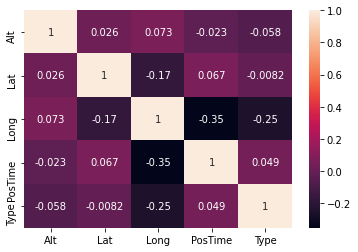

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = train_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
train_df['Cross'] = train_df['Lat'] * train_df['Long']
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type     Cross
0         008DC6  0.088502  0.570442  0.578876  1596723690985     6  0.330215
1         008DC6  0.089647  0.570432  0.578902  1596723703073     6  0.330225
2         008DC6  0.090028  0.570430  0.578911  1596723717541     6  0.330228
3         008DC6  0.090028  0.570430  0.578911  1596723719963     6  0.330228
4         008DC6  0.136568  0.570992  0.578782  1596724125875     6  0.330480
...          ...       ...       ...       ...            ...   ...       ...
13141208  E94C42  0.281147  0.601961  0.315125  1596733935427     0  0.189693
13141209  E94C42  0.281147  0.601961  0.315125  1596733935427     0  0.189693
13141210  E94C42  0.286107  0.601955  0.314975  1596733965728     0  0.189601
13141211  E94C42  0.301747  0.602027  0.314776  1596734007974     0  0.189504
13141212  E94C42  0.301747  0.602027  0.314776  1596734007974     0  0.189504

[13141213 rows x 7 columns]


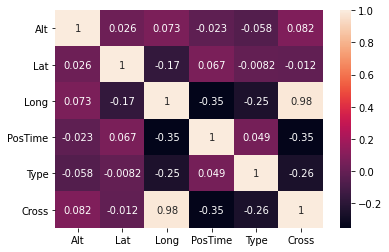

In [ ]:
corrMatrix = train_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
train_df = train_df.drop(columns = ['Cross'], axis = 1)

In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('Icao').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

(16046,)
16046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
#load in first dataframe
train_input = pd.DataFrame(data = train_df[1], columns = ["Icao", "Alt","Lat", "Long","PosTime", "Type"], index = None)
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('Icao', axis = 1)
print(train_input)
#Get Species Type
unique_species = train_input.Type[0]
print(unique_species)

                                Alt       Lat      Long Type
Time                                                        
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:13:29.760    0.995056  0.540866  0.551703    0
2020-08-06 07:13:44.242    0.998108  0.540902  0.551694    0
2020-08-06 07:13:56.289  0.00572213  0.540932  0.551686    0
...                             ...       ...       ...  ...
2020-08-06 16:02:45.713    0.999252   0.54098  0.551676    0
2020-08-06 16:02:57.784    0.996963  0.540951  0.551683    0
2020-08-06 16:03:55.777    0.994675  0.540866  0.551703    0
2020-08-06 16:04:10.278    0.994675  0.540864  0.551703    0
2020-08-06 16:04:27.227    0.994675  0.540863  0.551702    0

[373 rows x 4 columns]
0


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
norm_train_df['Long'] = train_input.Long.resample('5T').last()
norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
#norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat      Long       Alt
0  2020-08-06 07:10:00  0.541109  0.551641  0.026703
1  2020-08-06 07:15:00  0.542472  0.552251  0.217823
2  2020-08-06 07:20:00  0.544178  0.553254  0.402075
3  2020-08-06 07:25:00  0.546072  0.554713  0.501640
4  2020-08-06 07:30:00  0.547895  0.556523  0.586328
..                 ...       ...       ...       ...
68 2020-08-06 12:50:00  0.575555  0.585123 -1.378310
69 2020-08-06 12:55:00  0.575441  0.584925 -1.338937
70 2020-08-06 13:00:00  0.575300  0.584686 -1.292159
71 2020-08-06 13:05:00  0.575129  0.584407 -1.237701
72 2020-08-06 13:10:00  0.574928  0.584084 -1.175291

[73 rows x 4 columns]


In [ ]:
#add species to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,3))
print(final_input_train.shape)

[0]
[[ 0.54110926  0.55164051  0.02670329]
 [ 0.54247236  0.55225104  0.21782254]
 [ 0.54417837  0.55325353  0.40207523]
 [ 0.54607177  0.55471271  0.50164034]
 [ 0.54789543  0.5565232   0.58632792]
 [ 0.54969102  0.55826527  0.59510185]
 [ 0.55004507  0.55860418  0.59510185]
 [ 0.55061809  0.55913722  0.60817557]
 [ 0.55184827  0.56027639  0.62872997]
 [ 0.55359598  0.56188938  0.65039623]
 [ 0.55572157  0.5638439   0.66680553]
 [ 0.55808541  0.56600764  0.67158908]
 [ 0.56054785  0.56824831  0.65837804]
 [ 0.56296924  0.5704336   0.62080362]
 [ 0.56520995  0.57243121  0.55249699]
 [ 0.56713033  0.57410884  0.44708934]
 [ 0.56859511  0.57544625  0.30861372]
 [ 0.56961566  0.57667202  0.17662318]
 [ 0.57040614  0.5773856   0.08812085]
 [ 0.57044345  0.57741934  0.08392462]
 [ 0.57031141  0.57733422  0.09457798]
 [ 0.57020701  0.57728254  0.09927008]
 [ 0.57012913  0.57726283  0.09827373]
 [ 0.57007663  0.57727358  0.09186173]
 [ 0.57004836  0.5773133   0.0803069 ]
 [ 0.5700432   0.5773

In [ ]:
for j in range(2,16046):
    try:
        train_input = pd.DataFrame(data = train_df[j], columns = ["Icao","Alt","Lat", "Long","PosTime", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        unique_species = train_input.Type[0]
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
        norm_train_df['Long'] = train_input.Long.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
        norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
        norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        #norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,3))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

(10376, 73, 3)
10376


In [ ]:
final_input_test = final_input_train[7263:]
arr = list(range(7263,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[7263:]
print(len(test_labels))

train_labels_final = train_labels[:7263]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 10)
train_labels_final = to_categorical(train_labels_final,num_classes = 10)
print(len(test_labels))
print(len(train_labels_final))

train_labels_final = np.array(train_labels_final)
test_labels = np.array(test_labels)
print(train_labels_final)

(3113, 73, 3)
(7263, 73, 3)
3113
7263
[9, 8, 2, 1, 4, 6, 0, 5, 3, 7]
[0, 1, 5, 7, 4, 3, 6, 2, 8, 9]
3113
7263
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 1000, 128
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 10
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
#model.add(Dense(50, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)


Epoch 1/1000
57/57 - 4s - loss: 2.1759 - accuracy: 0.2810
Epoch 2/1000
57/57 - 3s - loss: 1.9931 - accuracy: 0.3014
Epoch 3/1000
57/57 - 3s - loss: 1.9105 - accuracy: 0.3454
Epoch 4/1000
57/57 - 3s - loss: 1.8272 - accuracy: 0.3691
Epoch 5/1000
57/57 - 3s - loss: 1.7875 - accuracy: 0.3763
Epoch 6/1000
57/57 - 3s - loss: 1.7220 - accuracy: 0.3857
Epoch 7/1000
57/57 - 3s - loss: 1.7237 - accuracy: 0.3884
Epoch 8/1000
57/57 - 3s - loss: 1.6795 - accuracy: 0.3870
Epoch 9/1000
57/57 - 3s - loss: 1.6450 - accuracy: 0.3969
Epoch 10/1000
57/57 - 3s - loss: 1.6219 - accuracy: 0.3945
Epoch 11/1000
57/57 - 3s - loss: 1.6417 - accuracy: 0.3996
Epoch 12/1000
57/57 - 3s - loss: 1.6059 - accuracy: 0.3976
Epoch 13/1000
57/57 - 3s - loss: 1.6435 - accuracy: 0.4022
Epoch 14/1000
57/57 - 3s - loss: 1.5902 - accuracy: 0.4013
Epoch 15/1000
57/57 - 3s - loss: 1.5852 - accuracy: 0.4069
Epoch 16/1000
57/57 - 3s - loss: 1.6090 - accuracy: 0.4074
Epoch 17/1000
57/57 - 3s - loss: 1.5717 - accuracy: 0.4089
Epoch 

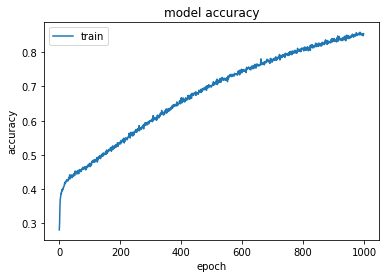

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

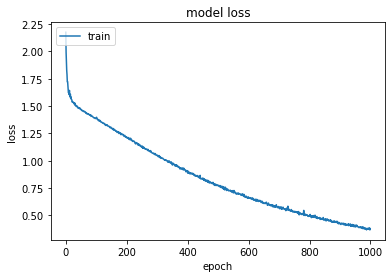

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(final_input_test)

max_given_input = np.argmax(test_labels, axis=1)
max_predicted_output = np.argmax(prediction, axis=1)
print(max_given_input)
print(max_predicted_output)

[9 8 2 ... 7 0 0]
[3 3 2 ... 0 4 4]


In [ ]:
!pip install scikit-plot

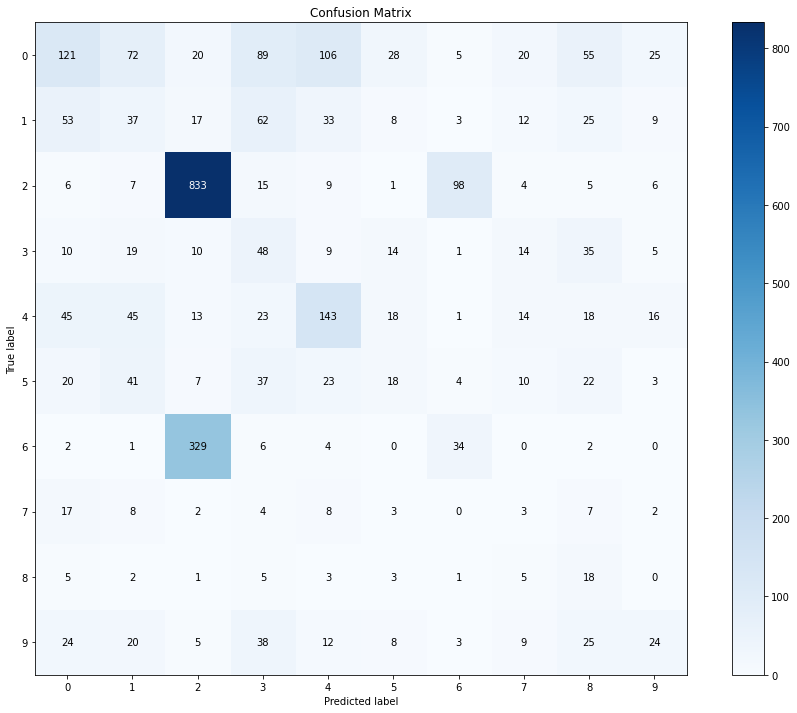

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(max_given_input, max_predicted_output, ax=ax)

# Top 10 Types (rand)
Added some random shuffling to the numpy arrays before split into training and test data

Remove rows not in the top 10 types

In [ ]:

train_df = train_df[train_df['Type'].isin(list(Percentages[:10].index))]
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
994       008DC6  0.088502  0.570442  0.578876  1596723690985  P28A
995       008DC6  0.089647  0.570432  0.578902  1596723703073  P28A
996       008DC6  0.090028  0.570430  0.578911  1596723717541  P28A
997       008DC6  0.090028  0.570430  0.578911  1596723719963  P28A
998       008DC6  0.136568  0.570992  0.578782  1596724125875  P28A
...          ...       ...       ...       ...            ...   ...
29550390  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550391  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550392  E94C42  0.286107  0.601955  0.314975  1596733965728  B738
29550393  E94C42  0.301747  0.602027  0.314776  1596734007974  B738
29550394  E94C42  0.301747  0.602027  0.314776  1596734007974  B738

[13141213 rows x 6 columns]


Replace types with numbers

In [ ]:
type_dict = {k: v for v, k in enumerate(list(Percentages[:10].index))}
print(type_dict)
train_df['Type'].replace(type_dict, inplace = True)
train_df = train_df.reset_index(drop = True)
print(train_df)

{'B738': 0, 'A320': 1, 'C172': 2, 'A321': 3, 'B737': 4, 'A319': 5, 'P28A': 6, 'A20N': 7, 'B763': 8, 'B739': 9}


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('Icao').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

(16046,)
16046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
#load in first dataframe
train_input = pd.DataFrame(data = train_df[1], columns = ["Icao", "Alt","Lat", "Long","PosTime", "Type"], index = None)
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('Icao', axis = 1)
print(train_input)
#Get Species Type
unique_species = train_input.Type[0]
print(unique_species)

                                Alt       Lat      Long Type
Time                                                        
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:13:29.760    0.995056  0.540866  0.551703    0
2020-08-06 07:13:44.242    0.998108  0.540902  0.551694    0
2020-08-06 07:13:56.289  0.00572213  0.540932  0.551686    0
...                             ...       ...       ...  ...
2020-08-06 16:02:45.713    0.999252   0.54098  0.551676    0
2020-08-06 16:02:57.784    0.996963  0.540951  0.551683    0
2020-08-06 16:03:55.777    0.994675  0.540866  0.551703    0
2020-08-06 16:04:10.278    0.994675  0.540864  0.551703    0
2020-08-06 16:04:27.227    0.994675  0.540863  0.551702    0

[373 rows x 4 columns]
0


In [ ]:
#Resampling/Interpolating (1 sample every 5 minutes for 6 hours)
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
norm_train_df['Long'] = train_input.Long.resample('5T').last()
norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat      Long       Alt
0  2020-08-06 07:10:00  0.541109  0.551641  0.026703
1  2020-08-06 07:15:00  0.542472  0.552251  0.217823
2  2020-08-06 07:20:00  0.544178  0.553254  0.402075
3  2020-08-06 07:25:00  0.546072  0.554713  0.501640
4  2020-08-06 07:30:00  0.547895  0.556523  0.586328
..                 ...       ...       ...       ...
68 2020-08-06 12:50:00  0.575555  0.585123 -1.378310
69 2020-08-06 12:55:00  0.575441  0.584925 -1.338937
70 2020-08-06 13:00:00  0.575300  0.584686 -1.292159
71 2020-08-06 13:05:00  0.575129  0.584407 -1.237701
72 2020-08-06 13:10:00  0.574928  0.584084 -1.175291

[73 rows x 4 columns]


In [ ]:
#add species to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,3))
print(final_input_train.shape)

[0]
[[ 0.54110926  0.55164051  0.02670329]
 [ 0.54247236  0.55225104  0.21782254]
 [ 0.54417837  0.55325353  0.40207523]
 [ 0.54607177  0.55471271  0.50164034]
 [ 0.54789543  0.5565232   0.58632792]
 [ 0.54969102  0.55826527  0.59510185]
 [ 0.55004507  0.55860418  0.59510185]
 [ 0.55061809  0.55913722  0.60817557]
 [ 0.55184827  0.56027639  0.62872997]
 [ 0.55359598  0.56188938  0.65039623]
 [ 0.55572157  0.5638439   0.66680553]
 [ 0.55808541  0.56600764  0.67158908]
 [ 0.56054785  0.56824831  0.65837804]
 [ 0.56296924  0.5704336   0.62080362]
 [ 0.56520995  0.57243121  0.55249699]
 [ 0.56713033  0.57410884  0.44708934]
 [ 0.56859511  0.57544625  0.30861372]
 [ 0.56961566  0.57667202  0.17662318]
 [ 0.57040614  0.5773856   0.08812085]
 [ 0.57044345  0.57741934  0.08392462]
 [ 0.57031141  0.57733422  0.09457798]
 [ 0.57020701  0.57728254  0.09927008]
 [ 0.57012913  0.57726283  0.09827373]
 [ 0.57007663  0.57727358  0.09186173]
 [ 0.57004836  0.5773133   0.0803069 ]
 [ 0.5700432   0.5773

In [ ]:
for j in range(2,16046):
    try:
        train_input = pd.DataFrame(data = train_df[j], columns = ["Icao","Alt","Lat", "Long","PosTime", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        unique_species = train_input.Type[0]
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
        norm_train_df['Long'] = train_input.Long.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
        norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
        norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        #norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,3))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

(10376, 73, 3)
10376


In [ ]:
#convert lists to numpy array
final_input_train = np.array(final_input_train)
train_labels = np.array(train_labels)

#shuffle arrays
shuffler = np.random.permutation(len(final_input_train))
final_input_train = final_input_train[shuffler]
train_labels = train_labels[shuffler]

#split into train and test
final_input_test = final_input_train[7263:]
arr = list(range(7263,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[7263:]
print(len(test_labels))

train_labels_final = train_labels[:7263]
print(len(train_labels_final))

#Get Unique values in each dataframe
unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

#One Hot Encode Types
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 10)
train_labels_final = to_categorical(train_labels_final,num_classes = 10)
print(len(test_labels))
print(len(train_labels_final))

(3113, 73, 3)
(7263, 73, 3)
3113
7263
[0, 4, 2, 5, 3, 9, 6, 7, 1, 8]
[1, 4, 2, 0, 7, 6, 8, 5, 3, 9]
3113
7263


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 300, 128
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 10
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)


Epoch 1/300
57/57 - 4s - loss: 2.2994 - accuracy: 0.2221
Epoch 2/300
57/57 - 3s - loss: 2.0940 - accuracy: 0.3007
Epoch 3/300
57/57 - 3s - loss: 2.0621 - accuracy: 0.3591
Epoch 4/300
57/57 - 3s - loss: 1.8707 - accuracy: 0.3693
Epoch 5/300
57/57 - 3s - loss: 1.7801 - accuracy: 0.3848
Epoch 6/300
57/57 - 3s - loss: 1.7727 - accuracy: 0.3931
Epoch 7/300
57/57 - 3s - loss: 1.7689 - accuracy: 0.3963
Epoch 8/300
57/57 - 3s - loss: 1.6792 - accuracy: 0.4037
Epoch 9/300
57/57 - 3s - loss: 1.7575 - accuracy: 0.4036
Epoch 10/300
57/57 - 3s - loss: 1.6615 - accuracy: 0.4117
Epoch 11/300
57/57 - 3s - loss: 1.6862 - accuracy: 0.4102
Epoch 12/300
57/57 - 3s - loss: 1.6552 - accuracy: 0.4078
Epoch 13/300
57/57 - 3s - loss: 1.6324 - accuracy: 0.4146
Epoch 14/300
57/57 - 3s - loss: 1.6412 - accuracy: 0.4153
Epoch 15/300
57/57 - 3s - loss: 1.6114 - accuracy: 0.4154
Epoch 16/300
57/57 - 3s - loss: 1.6121 - accuracy: 0.4184
Epoch 17/300
57/57 - 3s - loss: 1.5792 - accuracy: 0.4215
Epoch 18/300
57/57 - 3s

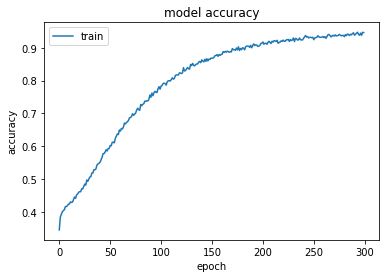

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

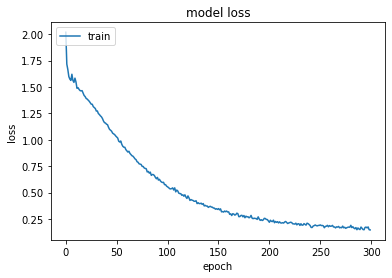

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Top 10 Types (rocket)
Rocket is another type of model from sklearn that is also well suited for time series data

In [ ]:
#remove rows not in the top 16 types
train_df = train_df[train_df['Type'].isin(list(Percentages[:10].index))]
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
994       008DC6  0.088502  0.570442  0.578876  1596723690985  P28A
995       008DC6  0.089647  0.570432  0.578902  1596723703073  P28A
996       008DC6  0.090028  0.570430  0.578911  1596723717541  P28A
997       008DC6  0.090028  0.570430  0.578911  1596723719963  P28A
998       008DC6  0.136568  0.570992  0.578782  1596724125875  P28A
...          ...       ...       ...       ...            ...   ...
29550390  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550391  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550392  E94C42  0.286107  0.601955  0.314975  1596733965728  B738
29550393  E94C42  0.301747  0.602027  0.314776  1596734007974  B738
29550394  E94C42  0.301747  0.602027  0.314776  1596734007974  B738

[13141213 rows x 6 columns]


In [ ]:
type_dict = {k: v for v, k in enumerate(list(Percentages[:10].index))}
print(type_dict)

{'B738': 0, 'A320': 1, 'C172': 2, 'A321': 3, 'B737': 4, 'A319': 5, 'P28A': 6, 'A20N': 7, 'B763': 8, 'B739': 9}


In [ ]:
train_df['Type'].replace(type_dict, inplace = True)

In [ ]:
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
0         008DC6  0.088502  0.570442  0.578876  1596723690985     6
1         008DC6  0.089647  0.570432  0.578902  1596723703073     6
2         008DC6  0.090028  0.570430  0.578911  1596723717541     6
3         008DC6  0.090028  0.570430  0.578911  1596723719963     6
4         008DC6  0.136568  0.570992  0.578782  1596724125875     6
...          ...       ...       ...       ...            ...   ...
13141208  E94C42  0.281147  0.601961  0.315125  1596733935427     0
13141209  E94C42  0.281147  0.601961  0.315125  1596733935427     0
13141210  E94C42  0.286107  0.601955  0.314975  1596733965728     0
13141211  E94C42  0.301747  0.602027  0.314776  1596734007974     0
13141212  E94C42  0.301747  0.602027  0.314776  1596734007974     0

[13141213 rows x 6 columns]


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('Icao').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

(16046,)
16046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
#load in first dataframe
train_input = pd.DataFrame(data = train_df[1], columns = ["Icao", "Alt","Lat", "Long","PosTime", "Type"], index = None)
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('Icao', axis = 1)
print(train_input)
#Get Species Type
unique_species = train_input.Type[0]
print(unique_species)

                                Alt       Lat      Long Type
Time                                                        
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:13:29.760    0.995056  0.540866  0.551703    0
2020-08-06 07:13:44.242    0.998108  0.540902  0.551694    0
2020-08-06 07:13:56.289  0.00572213  0.540932  0.551686    0
...                             ...       ...       ...  ...
2020-08-06 16:02:45.713    0.999252   0.54098  0.551676    0
2020-08-06 16:02:57.784    0.996963  0.540951  0.551683    0
2020-08-06 16:03:55.777    0.994675  0.540866  0.551703    0
2020-08-06 16:04:10.278    0.994675  0.540864  0.551703    0
2020-08-06 16:04:27.227    0.994675  0.540863  0.551702    0

[373 rows x 4 columns]
0


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
norm_train_df['Long'] = train_input.Long.resample('5T').last()
norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
#norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat      Long       Alt
0  2020-08-06 07:10:00  0.541109  0.551641  0.026703
1  2020-08-06 07:15:00  0.542472  0.552251  0.217823
2  2020-08-06 07:20:00  0.544178  0.553254  0.402075
3  2020-08-06 07:25:00  0.546072  0.554713  0.501640
4  2020-08-06 07:30:00  0.547895  0.556523  0.586328
..                 ...       ...       ...       ...
68 2020-08-06 12:50:00  0.575555  0.585123 -1.378310
69 2020-08-06 12:55:00  0.575441  0.584925 -1.338937
70 2020-08-06 13:00:00  0.575300  0.584686 -1.292159
71 2020-08-06 13:05:00  0.575129  0.584407 -1.237701
72 2020-08-06 13:10:00  0.574928  0.584084 -1.175291

[73 rows x 4 columns]


In [ ]:
#add species to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,3))
print(final_input_train.shape)

[0]
[[ 0.54110926  0.55164051  0.02670329]
 [ 0.54247236  0.55225104  0.21782254]
 [ 0.54417837  0.55325353  0.40207523]
 [ 0.54607177  0.55471271  0.50164034]
 [ 0.54789543  0.5565232   0.58632792]
 [ 0.54969102  0.55826527  0.59510185]
 [ 0.55004507  0.55860418  0.59510185]
 [ 0.55061809  0.55913722  0.60817557]
 [ 0.55184827  0.56027639  0.62872997]
 [ 0.55359598  0.56188938  0.65039623]
 [ 0.55572157  0.5638439   0.66680553]
 [ 0.55808541  0.56600764  0.67158908]
 [ 0.56054785  0.56824831  0.65837804]
 [ 0.56296924  0.5704336   0.62080362]
 [ 0.56520995  0.57243121  0.55249699]
 [ 0.56713033  0.57410884  0.44708934]
 [ 0.56859511  0.57544625  0.30861372]
 [ 0.56961566  0.57667202  0.17662318]
 [ 0.57040614  0.5773856   0.08812085]
 [ 0.57044345  0.57741934  0.08392462]
 [ 0.57031141  0.57733422  0.09457798]
 [ 0.57020701  0.57728254  0.09927008]
 [ 0.57012913  0.57726283  0.09827373]
 [ 0.57007663  0.57727358  0.09186173]
 [ 0.57004836  0.5773133   0.0803069 ]
 [ 0.5700432   0.5773

In [ ]:
for j in range(2,16046):
    try:
        train_input = pd.DataFrame(data = train_df[j], columns = ["Icao","Alt","Lat", "Long","PosTime", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        unique_species = train_input.Type[0]
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
        norm_train_df['Long'] = train_input.Long.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
        norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
        norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        #norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,3))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

(10376, 73, 3)
10376


In [ ]:
#convert lists to numpy array
final_input_train = np.array(final_input_train)
train_labels = np.array(train_labels)

#shuffle arrays
shuffler = np.random.permutation(len(final_input_train))
final_input_train = final_input_train[shuffler]
train_labels = train_labels[shuffler]

#split into train and test
final_input_test = final_input_train[7263:]
arr = list(range(7263,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[7263:]
print(len(test_labels))

train_labels_final = train_labels[:7263]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

#from keras.utils.np_utils import to_categorical
#test_labels = to_categorical(test_labels,num_classes = 10)
#train_labels_final = to_categorical(train_labels_final,num_classes = 10)
print(len(test_labels))
print(len(train_labels_final))

(3113, 73, 3)
(7263, 73, 3)
3113
7263
[9, 8, 0, 2, 1, 4, 7, 5, 3, 6]
[0, 9, 3, 2, 1, 8, 5, 6, 4, 7]
3113
7263


In [ ]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
rocket = Rocket()
rocket.fit(final_input_train)
X_train_transform = rocket.transform(final_input_train)


In [ ]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize= True)
classifier.fit(X_train_transform, train_labels_final)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [ ]:
X_test_transform = rocket.transform(final_input_test)
classifier.score(X_test_transform, test_labels)

0.35721169290073884

In [ ]:
rocket = Rocket()
rocket.fit(final_input_train)
X_train_transform = rocket.transform(final_input_train)

In [ ]:
classifier = SGDClassifier(loss='log')
classifier.fit(X_train_transform, train_labels_final)

SGDClassifier(loss='log')

In [ ]:
X_test_transform = rocket.transform(final_input_test)
classifier.score(X_test_transform, test_labels)

0.1831031159653068

# Top 50 Types

In [ ]:
#remove rows not in the top 16 types
train_df = train_df[train_df['Type'].isin(list(Percentages[:50].index))]
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
242       0085A0  0.077821  0.570471  0.577568  1596699295274  SR20
243       0085A0  0.078965  0.570457  0.577557  1596699307326  SR20
244       0085A0  0.078965  0.570446  0.577549  1596699331462  SR20
245       0085A0  0.078965  0.570446  0.577549  1596699336293  SR20
246       0085A0  0.078965  0.570446  0.577549  1596699336293  SR20
...          ...       ...       ...       ...            ...   ...
29550390  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550391  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550392  E94C42  0.286107  0.601955  0.314975  1596733965728  B738
29550393  E94C42  0.301747  0.602027  0.314776  1596734007974  B738
29550394  E94C42  0.301747  0.602027  0.314776  1596734007974  B738

[21206266 rows x 6 columns]


In [ ]:
type_dict = {k: v for v, k in enumerate(list(Percentages[:50].index))}
print(type_dict)

{'B738': 0, 'A320': 1, 'C172': 2, 'A321': 3, 'B737': 4, 'A319': 5, 'P28A': 6, 'A20N': 7, 'B763': 8, 'B739': 9, 'E75L': 10, 'B752': 11, 'B789': 12, 'B773': 13, 'CRJ9': 14, 'B77L': 15, 'C182': 16, 'PC12': 17, 'E190': 18, 'C208': 19, 'B744': 20, 'A333': 21, 'A21N': 22, 'BE20': 23, 'E170': 24, 'CRJ7': 25, 'A359': 26, 'DA40': 27, 'C152': 28, 'SR22': 29, 'A306': 30, 'CRJ2': 31, 'C56X': 32, 'A332': 33, 'DH8D': 34, 'B748': 35, 'MD11': 36, 'E55P': 37, 'B788': 38, 'B350': 39, 'BE9L': 40, 'AT76': 41, 'TEX2': 42, 'EC35': 43, 'SR20': 44, 'AS50': 45, 'E145': 46, 'B734': 47, 'B77W': 48, 'R44': 49}


In [ ]:
train_df['Type'].replace(type_dict, inplace = True)

In [ ]:
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
0         0085A0  0.077821  0.570471  0.577568  1596699295274    44
1         0085A0  0.078965  0.570457  0.577557  1596699307326    44
2         0085A0  0.078965  0.570446  0.577549  1596699331462    44
3         0085A0  0.078965  0.570446  0.577549  1596699336293    44
4         0085A0  0.078965  0.570446  0.577549  1596699336293    44
...          ...       ...       ...       ...            ...   ...
21206261  E94C42  0.281147  0.601961  0.315125  1596733935427     0
21206262  E94C42  0.281147  0.601961  0.315125  1596733935427     0
21206263  E94C42  0.286107  0.601955  0.314975  1596733965728     0
21206264  E94C42  0.301747  0.602027  0.314776  1596734007974     0
21206265  E94C42  0.301747  0.602027  0.314776  1596734007974     0

[21206266 rows x 6 columns]


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('Icao').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(28280,)
28280


In [ ]:
#load in first dataframe
train_input = pd.DataFrame(data = train_df[0], columns = ["Icao", "Alt","Lat", "Long","PosTime", "Type"], index = None)
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('Icao', axis = 1)
print(train_input)
#Get Species Type
unique_species = train_input.Type[0]
print(unique_species)

                               Alt       Lat      Long Type
Time                                                       
2020-08-06 07:34:55.274   0.077821  0.570471  0.577568   44
2020-08-06 07:35:07.326  0.0789654  0.570457  0.577557   44
2020-08-06 07:35:31.462  0.0789654  0.570446  0.577549   44
2020-08-06 07:35:36.293  0.0789654  0.570446  0.577549   44
2020-08-06 07:35:36.293  0.0789654  0.570446  0.577549   44
...                            ...       ...       ...  ...
2020-08-06 15:41:24.882  0.0804913  0.571008  0.577433   44
2020-08-06 15:41:24.882  0.0804913  0.571008  0.577433   44
2020-08-06 15:48:30.146  0.0793469  0.570518  0.577572   44
2020-08-06 15:48:39.992  0.0804913   0.57053  0.577587   44
2020-08-06 15:48:39.992  0.0804913   0.57053  0.577587   44

[201 rows x 4 columns]
44


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
norm_train_df['Long'] = train_input.Long.resample('5T').last()
norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat      Long       Alt
0  2020-08-06 07:30:00  0.570471  0.577568  0.077821
1  2020-08-06 07:35:00  0.570446  0.577549  0.078965
2  2020-08-06 07:40:00  0.570541  0.577507  0.078202
3  2020-08-06 07:45:00  0.570466  0.577541  0.078584
4  2020-08-06 07:50:00  0.570452  0.577545  0.078965
..                 ...       ...       ...       ...
68 2020-08-06 13:10:00  0.572265  0.580598  0.066191
69 2020-08-06 13:15:00  0.572310  0.580571  0.065826
70 2020-08-06 13:20:00  0.572348  0.580534  0.065575
71 2020-08-06 13:25:00  0.572381  0.580485  0.065450
72 2020-08-06 13:30:00  0.572406  0.580425  0.065460

[73 rows x 4 columns]


In [ ]:
#add species to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,3))
print(final_input_train.shape)

[44]
[[0.57047081 0.57756847 0.07782101]
 [0.57044649 0.5775491  0.07896544]
 [0.57054144 0.57750708 0.07820249]
 [0.5704658  0.57754093 0.07858396]
 [0.57045233 0.5775454  0.07896544]
 [0.57048124 0.57752782 0.07858396]
 [0.57042021 0.57742244 0.07972839]
 [0.57044011 0.57752955 0.07896544]
 [0.5704692  0.57754183 0.07934691]
 [0.57046342 0.57752645 0.07934691]
 [0.57046199 0.57755584 0.07934691]
 [0.57044059 0.57754016 0.08010986]
 [0.57043159 0.57753521 0.08010986]
 [0.57049078 0.57750815 0.07858396]
 [0.57055104 0.57747464 0.07706896]
 [0.57059288 0.57744333 0.07596602]
 [0.57061848 0.57741485 0.07523251]
 [0.57062998 0.57738987 0.0748258 ]
 [0.57062955 0.57736903 0.07470325]
 [0.57061935 0.57735299 0.07482225]
 [0.57060153 0.57734239 0.07514015]
 [0.57057825 0.57733788 0.07561433]
 [0.57055167 0.57734012 0.07620215]
 [0.57052396 0.57734976 0.07686099]
 [0.57049726 0.57736744 0.07754822]
 [0.57047375 0.57739382 0.0782212 ]
 [0.57045557 0.57742954 0.07883731]
 [0.57044489 0.57747527

In [ ]:
for j in range(1,28280):
    try:
        train_input = pd.DataFrame(data = train_df[j], columns = ["Icao","Alt","Lat", "Long","PosTime", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        unique_species = train_input.Type[0]
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
        norm_train_df['Long'] = train_input.Long.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
        norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
        norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,3))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))
DATA = final_input_train
LABELS = train_labels

(17018, 73, 3)
17018


In [ ]:
final_input_train = DATA
train_labels = LABELS
final_input_test = final_input_train[11913:]
arr = list(range(11913,final_input_train.shape[0] ))
#arr = list(range(6000,final_input_train.shape[0] ))
print(final_input_test.shape)
final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)
test_labels = train_labels[11913:]
print(len(test_labels))

train_labels_final = train_labels[:11913]
#train_labels_final = train_labels[:6000]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 50)
train_labels_final = to_categorical(train_labels_final,num_classes = 50)
print(len(test_labels))
print(len(train_labels_final))

train_labels_final = np.array(train_labels_final)
test_labels = np.array(test_labels)
print(train_labels_final)

(5105, 73, 3)
(11913, 73, 3)
5105
11913
[2, 25, 0, 1, 5, 32, 40, 29, 43, 6, 49, 36, 16, 3, 28, 45, 17, 19, 27, 7, 23, 8, 22, 9, 11, 44, 39, 14, 4, 37, 20, 31, 46, 10, 35, 24, 47, 30, 15, 41, 48, 34, 38, 21, 12, 33, 42, 13, 18, 26]
[44, 0, 18, 39, 1, 17, 33, 13, 5, 12, 14, 7, 4, 38, 15, 26, 47, 34, 19, 3, 48, 35, 40, 6, 11, 41, 32, 46, 37, 30, 31, 27, 2, 21, 28, 23, 43, 16, 24, 45, 29, 22, 36, 49, 8, 20, 9, 42, 10, 25]
5105
11913
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 300, 128
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 50
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)


Epoch 1/300
94/94 - 6s - loss: 3.6381 - accuracy: 0.1749
Epoch 2/300
94/94 - 5s - loss: 3.1542 - accuracy: 0.2329
Epoch 3/300
94/94 - 5s - loss: 3.0602 - accuracy: 0.2373
Epoch 4/300
94/94 - 5s - loss: 2.9598 - accuracy: 0.2421
Epoch 5/300
94/94 - 5s - loss: 2.9557 - accuracy: 0.2413
Epoch 6/300
94/94 - 5s - loss: 2.8695 - accuracy: 0.2464
Epoch 7/300
94/94 - 5s - loss: 2.8435 - accuracy: 0.2462
Epoch 8/300
94/94 - 5s - loss: 2.7911 - accuracy: 0.2515
Epoch 9/300
94/94 - 5s - loss: 2.7788 - accuracy: 0.2569
Epoch 10/300
94/94 - 5s - loss: 2.7319 - accuracy: 0.2567
Epoch 11/300
94/94 - 5s - loss: 2.6963 - accuracy: 0.2590
Epoch 12/300
94/94 - 5s - loss: 2.6745 - accuracy: 0.2664
Epoch 13/300
94/94 - 5s - loss: 2.6642 - accuracy: 0.2637
Epoch 14/300
94/94 - 5s - loss: 2.6420 - accuracy: 0.2705
Epoch 15/300
94/94 - 5s - loss: 2.6447 - accuracy: 0.2701
Epoch 16/300
94/94 - 5s - loss: 2.6223 - accuracy: 0.2727
Epoch 17/300
94/94 - 5s - loss: 2.6071 - accuracy: 0.2726
Epoch 18/300
94/94 - 5s

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

NameError: ignored

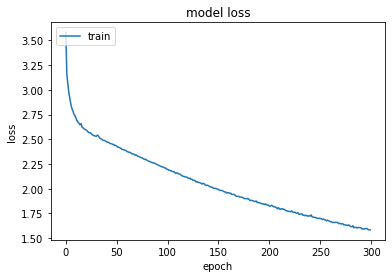

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Top 10 Types (x,y,z)

In [ ]:
#remove rows not in the top 16 types
train_df = train_df[train_df['Type'].isin(list(Percentages[:10].index))]
print(train_df)

            Icao       Alt        Lat       Long        PosTime  Type
994       008DC6  0.088502 -25.992256  28.387245  1596723690985  P28A
995       008DC6  0.089647 -25.994843  28.396912  1596723703073  P28A
996       008DC6  0.090028 -25.995621  28.399864  1596723717541  P28A
997       008DC6  0.090028 -25.995621  28.399864  1596723719963  P28A
998       008DC6  0.136568 -25.843708  28.353390  1596724125875  P28A
...          ...       ...        ...        ...            ...   ...
29550390  E94C42  0.281147 -17.482864 -66.559227  1596733935427  B738
29550391  E94C42  0.281147 -17.482864 -66.559227  1596733935427  B738
29550392  E94C42  0.286107 -17.484467 -66.613289  1596733965728  B738
29550393  E94C42  0.301747 -17.464863 -66.685097  1596734007974  B738
29550394  E94C42  0.301747 -17.464863 -66.685097  1596734007974  B738

[13141213 rows x 6 columns]


In [ ]:
type_dict = {k: v for v, k in enumerate(list(Percentages[:10].index))}
print(type_dict)

{'B738': 0, 'A320': 1, 'C172': 2, 'A321': 3, 'B737': 4, 'A319': 5, 'P28A': 6, 'A20N': 7, 'B763': 8, 'B739': 9}


In [ ]:
train_df['Type'].replace(type_dict, inplace = True)

TypeError: ignored

In [ ]:
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao       Alt        Lat       Long        PosTime  Type
0         008DC6  0.088502 -25.992256  28.387245  1596723690985     6
1         008DC6  0.089647 -25.994843  28.396912  1596723703073     6
2         008DC6  0.090028 -25.995621  28.399864  1596723717541     6
3         008DC6  0.090028 -25.995621  28.399864  1596723719963     6
4         008DC6  0.136568 -25.843708  28.353390  1596724125875     6
...          ...       ...        ...        ...            ...   ...
13141208  E94C42  0.281147 -17.482864 -66.559227  1596733935427     0
13141209  E94C42  0.281147 -17.482864 -66.559227  1596733935427     0
13141210  E94C42  0.286107 -17.484467 -66.613289  1596733965728     0
13141211  E94C42  0.301747 -17.464863 -66.685097  1596734007974     0
13141212  E94C42  0.301747 -17.464863 -66.685097  1596734007974     0

[13141213 rows x 6 columns]


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('Icao').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

(16046,)
16046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
#load in first dataframe
train_input = pd.DataFrame(data = train_df[1], columns = ["Icao", "Alt","Lat", "Long","PosTime", "Type"], index = None)
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('Icao', axis = 1)
print(train_input)
#Get Species Type
unique_species = train_input.Type[0]
print(unique_species)

                                Alt      Lat     Long Type
Time                                                      
2020-08-06 07:12:53.616    0.995056 -33.9873  18.6088    0
2020-08-06 07:12:53.616    0.995056 -33.9873  18.6088    0
2020-08-06 07:13:29.760    0.995056 -33.9772  18.6055    0
2020-08-06 07:13:44.242    0.998108 -33.9675  18.6024    0
2020-08-06 07:13:56.289  0.00572213 -33.9593  18.5995    0
...                             ...      ...      ...  ...
2020-08-06 16:02:45.713    0.999252 -33.9463  18.5956    0
2020-08-06 16:02:57.784    0.996963 -33.9541  18.5981    0
2020-08-06 16:03:55.777    0.994675 -33.9771  18.6055    0
2020-08-06 16:04:10.278    0.994675 -33.9778  18.6055    0
2020-08-06 16:04:27.227    0.994675 -33.9779  18.6052    0

[373 rows x 4 columns]
0


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
norm_train_df['Long'] = train_input.Long.resample('5T').last()
norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df['X'] = np.cos(norm_train_df['Lat'])*np.cos(norm_train_df['Long'])
norm_train_df['Y'] = np.cos(norm_train_df['Lat'])*np.sin(norm_train_df['Long'])
norm_train_df['Z'] = np.sin(norm_train_df['Lat'])
norm_train_df = norm_train_df.drop(['Lat', 'Long'], axis = 1)
norm_train_df.reset_index(inplace = True)
norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Alt         X         Y         Z
0  2020-08-06 07:10:00  0.026703 -0.770283  0.210344 -0.602013
1  2020-08-06 07:15:00  0.217823 -0.527870  0.024722 -0.848965
2  2020-08-06 07:20:00  0.402075 -0.091336 -0.029668 -0.995378
3  2020-08-06 07:25:00  0.501640  0.269307  0.300068 -0.915114
4  2020-08-06 07:30:00  0.586328  0.062704  0.785371 -0.615841
..                 ...       ...       ...       ...       ...
68 2020-08-06 12:50:00  0.000000  0.616940 -0.609703  0.497641
69 2020-08-06 12:55:00  0.000000  0.581517 -0.663431  0.470847
70 2020-08-06 13:00:00  0.000000  0.532755 -0.724819  0.436817
71 2020-08-06 13:05:00  0.000000  0.466976 -0.791179  0.394930
72 2020-08-06 13:10:00  0.000000  0.380428 -0.858236  0.344536

[73 rows x 5 columns]


In [ ]:
#add species to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,4))
print(final_input_train.shape)

[0]
[[ 0.02670329 -0.77028258  0.2103442  -0.60201334]
 [ 0.21782254 -0.52787019  0.02472167 -0.8489652 ]
 [ 0.40207523 -0.09133599 -0.0296684  -0.99537808]
 [ 0.50164034  0.26930658  0.30006819 -0.91511368]
 [ 0.58632792  0.06270415  0.78537095 -0.61584143]
 [ 0.59510185 -0.51221838  0.84026871 -0.17770996]
 [ 0.59510185 -0.6184077   0.78146291 -0.0829918 ]
 [ 0.60817557 -0.75676625  0.6497598   0.07153351]
 [ 0.62872997 -0.87870612  0.27121743  0.39283159]
 [ 0.65039623 -0.61539892 -0.17781411  0.76789733]
 [ 0.66680553 -0.06695013 -0.10088145  0.99264325]
 [ 0.67158908 -0.09477814  0.48494388  0.86939435]
 [ 0.65837804 -0.77836276  0.50019933  0.37941014]
 [ 0.62080362 -0.9428782  -0.2063924  -0.2615012 ]
 [ 0.55249699 -0.38332727 -0.51896531 -0.76402566]
 [ 0.44708934 -0.00586531 -0.18168871 -0.9833386 ]
 [ 0.30861372 -0.09164781  0.19012696 -0.97747246]
 [ 0.17662318 -0.36459835  0.29505189 -0.88318312]
 [ 0.08812085 -0.5884268   0.26523043 -0.76381066]
 [ 0.08392462 -0.59861979  

In [ ]:
for j in range(2,16046):
    try:
        train_input = pd.DataFrame(data = train_df[j], columns = ["Icao","Alt","Lat", "Long","PosTime", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        unique_species = train_input.Type[0]
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
        norm_train_df['Long'] = train_input.Long.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
        norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
        norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df['X'] = np.cos(norm_train_df['Lat'])*np.cos(norm_train_df['Long'])
        norm_train_df['Y'] = np.cos(norm_train_df['Lat'])*np.sin(norm_train_df['Long'])
        norm_train_df['Z'] = np.sin(norm_train_df['Lat'])
        norm_train_df = norm_train_df.drop(['Lat', 'Long'], axis = 1)
        norm_train_df.reset_index(inplace = True)
        norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,4))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

(10376, 73, 4)
10376


In [ ]:
final_input_test = final_input_train[7263:]
arr = list(range(7263,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[7263:]
print(len(test_labels))

train_labels_final = train_labels[:7263]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 10)
train_labels_final = to_categorical(train_labels_final,num_classes = 10)
print(len(test_labels))
print(len(train_labels_final))

train_labels_final = np.array(train_labels_final)
test_labels = np.array(test_labels)
print(train_labels_final)

(3113, 73, 4)
(7263, 73, 4)
3113
7263
[9, 8, 2, 1, 4, 6, 0, 5, 3, 7]
[0, 1, 5, 7, 4, 3, 6, 2, 8, 9]
3113
7263
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fit and evaluate a model
def evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels):
    verbose, epochs, batch_size = 2, 100, 16
    n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 10
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
    # evaluate model
    _, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
    return accuracy


# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=2):
    # load data
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

run_experiment()

Epoch 1/100
454/454 - 5s - loss: 1.8457 - accuracy: 0.3522
Epoch 2/100
454/454 - 4s - loss: 1.6236 - accuracy: 0.3901
Epoch 3/100
454/454 - 4s - loss: 1.5753 - accuracy: 0.4091
Epoch 4/100
454/454 - 4s - loss: 1.5755 - accuracy: 0.4292
Epoch 5/100
454/454 - 4s - loss: 1.5013 - accuracy: 0.4528
Epoch 6/100
454/454 - 4s - loss: 1.4374 - accuracy: 0.4761
Epoch 7/100
454/454 - 4s - loss: 1.3025 - accuracy: 0.5086
Epoch 8/100
454/454 - 4s - loss: 1.2183 - accuracy: 0.5430
Epoch 9/100
454/454 - 4s - loss: 1.1071 - accuracy: 0.5784
Epoch 10/100
454/454 - 4s - loss: 0.9877 - accuracy: 0.6329
Epoch 11/100
454/454 - 4s - loss: 0.8870 - accuracy: 0.6667
Epoch 12/100
454/454 - 4s - loss: 0.7865 - accuracy: 0.7118
Epoch 13/100
454/454 - 4s - loss: 0.6921 - accuracy: 0.7436
Epoch 14/100
454/454 - 4s - loss: 0.6113 - accuracy: 0.7731
Epoch 15/100
454/454 - 4s - loss: 0.5372 - accuracy: 0.8031
Epoch 16/100
454/454 - 4s - loss: 0.5016 - accuracy: 0.8147
Epoch 17/100
454/454 - 4s - loss: 0.4553 - accura

# Top 20 Types

In [ ]:
#remove rows not in the top 16 types
train_df = train_df[train_df['Type'].isin(list(Percentages[:20].index))]
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
994       008DC6  0.088502  0.570442  0.578876  1596723690985  P28A
995       008DC6  0.089647  0.570432  0.578902  1596723703073  P28A
996       008DC6  0.090028  0.570430  0.578911  1596723717541  P28A
997       008DC6  0.090028  0.570430  0.578911  1596723719963  P28A
998       008DC6  0.136568  0.570992  0.578782  1596724125875  P28A
...          ...       ...       ...       ...            ...   ...
29550390  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550391  E94C42  0.281147  0.601961  0.315125  1596733935427  B738
29550392  E94C42  0.286107  0.601955  0.314975  1596733965728  B738
29550393  E94C42  0.301747  0.602027  0.314776  1596734007974  B738
29550394  E94C42  0.301747  0.602027  0.314776  1596734007974  B738

[16355352 rows x 6 columns]


In [ ]:
type_dict = {k: v for v, k in enumerate(list(Percentages[:20].index))}
print(type_dict)

{'B738': 0, 'A320': 1, 'C172': 2, 'A321': 3, 'B737': 4, 'A319': 5, 'P28A': 6, 'A20N': 7, 'B763': 8, 'B739': 9, 'E75L': 10, 'B752': 11, 'B789': 12, 'B773': 13, 'CRJ9': 14, 'B77L': 15, 'C182': 16, 'PC12': 17, 'E190': 18, 'C208': 19}


In [ ]:
train_df['Type'].replace(type_dict, inplace = True)

In [ ]:
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
0         008DC6  0.088502  0.570442  0.578876  1596723690985     6
1         008DC6  0.089647  0.570432  0.578902  1596723703073     6
2         008DC6  0.090028  0.570430  0.578911  1596723717541     6
3         008DC6  0.090028  0.570430  0.578911  1596723719963     6
4         008DC6  0.136568  0.570992  0.578782  1596724125875     6
...          ...       ...       ...       ...            ...   ...
16355347  E94C42  0.281147  0.601961  0.315125  1596733935427     0
16355348  E94C42  0.281147  0.601961  0.315125  1596733935427     0
16355349  E94C42  0.286107  0.601955  0.314975  1596733965728     0
16355350  E94C42  0.301747  0.602027  0.314776  1596734007974     0
16355351  E94C42  0.301747  0.602027  0.314776  1596734007974     0

[16355352 rows x 6 columns]


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('Icao').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(20391,)
20391


In [ ]:
#load in first dataframe
train_input = pd.DataFrame(data = train_df[1], columns = ["Icao", "Alt","Lat", "Long","PosTime", "Type"], index = None)
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('Icao', axis = 1)
print(train_input)
#Get Species Type
unique_species = train_input.Type[0]
print(unique_species)

                                Alt       Lat      Long Type
Time                                                        
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:13:29.760    0.995056  0.540866  0.551703    0
2020-08-06 07:13:44.242    0.998108  0.540902  0.551694    0
2020-08-06 07:13:56.289  0.00572213  0.540932  0.551686    0
...                             ...       ...       ...  ...
2020-08-06 16:02:45.713    0.999252   0.54098  0.551676    0
2020-08-06 16:02:57.784    0.996963  0.540951  0.551683    0
2020-08-06 16:03:55.777    0.994675  0.540866  0.551703    0
2020-08-06 16:04:10.278    0.994675  0.540864  0.551703    0
2020-08-06 16:04:27.227    0.994675  0.540863  0.551702    0

[373 rows x 4 columns]
0


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
norm_train_df['Long'] = train_input.Long.resample('5T').last()
norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
#norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat      Long       Alt
0  2020-08-06 07:10:00  0.541109  0.551641  0.026703
1  2020-08-06 07:15:00  0.542472  0.552251  0.217823
2  2020-08-06 07:20:00  0.544178  0.553254  0.402075
3  2020-08-06 07:25:00  0.546072  0.554713  0.501640
4  2020-08-06 07:30:00  0.547895  0.556523  0.586328
..                 ...       ...       ...       ...
68 2020-08-06 12:50:00  0.575555  0.585123 -1.378310
69 2020-08-06 12:55:00  0.575441  0.584925 -1.338937
70 2020-08-06 13:00:00  0.575300  0.584686 -1.292159
71 2020-08-06 13:05:00  0.575129  0.584407 -1.237701
72 2020-08-06 13:10:00  0.574928  0.584084 -1.175291

[73 rows x 4 columns]


In [ ]:
#add species to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,3))
print(final_input_train.shape)

[0]
[[ 0.54110926  0.55164051  0.02670329]
 [ 0.54247236  0.55225104  0.21782254]
 [ 0.54417837  0.55325353  0.40207523]
 [ 0.54607177  0.55471271  0.50164034]
 [ 0.54789543  0.5565232   0.58632792]
 [ 0.54969102  0.55826527  0.59510185]
 [ 0.55004507  0.55860418  0.59510185]
 [ 0.55061809  0.55913722  0.60817557]
 [ 0.55184827  0.56027639  0.62872997]
 [ 0.55359598  0.56188938  0.65039623]
 [ 0.55572157  0.5638439   0.66680553]
 [ 0.55808541  0.56600764  0.67158908]
 [ 0.56054785  0.56824831  0.65837804]
 [ 0.56296924  0.5704336   0.62080362]
 [ 0.56520995  0.57243121  0.55249699]
 [ 0.56713033  0.57410884  0.44708934]
 [ 0.56859511  0.57544625  0.30861372]
 [ 0.56961566  0.57667202  0.17662318]
 [ 0.57040614  0.5773856   0.08812085]
 [ 0.57044345  0.57741934  0.08392462]
 [ 0.57031141  0.57733422  0.09457798]
 [ 0.57020701  0.57728254  0.09927008]
 [ 0.57012913  0.57726283  0.09827373]
 [ 0.57007663  0.57727358  0.09186173]
 [ 0.57004836  0.5773133   0.0803069 ]
 [ 0.5700432   0.5773

In [ ]:
for j in range(2,20391):
    try:
        train_input = pd.DataFrame(data = train_df[j], columns = ["Icao","Alt","Lat", "Long","PosTime", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        unique_species = train_input.Type[0]
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
        norm_train_df['Long'] = train_input.Long.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
        norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
        norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        #norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,3))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

(12878, 73, 3)
12878


In [ ]:
final_input_test = final_input_train[9014:]
arr = list(range(9014,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[9014:]
print(len(test_labels))

train_labels_final = train_labels[:9014]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 20)
train_labels_final = to_categorical(train_labels_final,num_classes = 20)
print(len(test_labels))
print(len(train_labels_final))

train_labels_final = np.array(train_labels_final)
test_labels = np.array(test_labels)
print(train_labels_final)

(3864, 73, 3)
(9014, 73, 3)
3864
9014
[4, 2, 17, 1, 11, 19, 6, 9, 14, 16, 0, 5, 3, 7, 8, 10, 15, 12, 13, 18]
[0, 18, 1, 17, 13, 5, 12, 14, 7, 4, 15, 19, 3, 6, 11, 2, 16, 8, 9, 10]
3864
9014
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fit and evaluate a model
def evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels):
    verbose, epochs, batch_size = 2, 100, 16
    n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 20
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
    # evaluate model
    _, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
    return accuracy


# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=2):
    # load data
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

run_experiment()

Epoch 1/100
564/564 - 5s - loss: 2.4051 - accuracy: 0.3046
Epoch 2/100
564/564 - 4s - loss: 2.0522 - accuracy: 0.3315
Epoch 3/100
564/564 - 4s - loss: 1.9878 - accuracy: 0.3424
Epoch 4/100
564/564 - 4s - loss: 1.9456 - accuracy: 0.3590
Epoch 5/100
564/564 - 4s - loss: 1.9361 - accuracy: 0.3643
Epoch 6/100
564/564 - 4s - loss: 1.8960 - accuracy: 0.3720
Epoch 7/100
564/564 - 4s - loss: 1.8675 - accuracy: 0.3719
Epoch 8/100
564/564 - 4s - loss: 1.8491 - accuracy: 0.3759
Epoch 9/100
564/564 - 4s - loss: 1.8211 - accuracy: 0.3815
Epoch 10/100
564/564 - 4s - loss: 1.7999 - accuracy: 0.3833
Epoch 11/100
564/564 - 4s - loss: 1.7643 - accuracy: 0.3915
Epoch 12/100
564/564 - 4s - loss: 1.7371 - accuracy: 0.3993
Epoch 13/100
564/564 - 4s - loss: 1.7136 - accuracy: 0.4004
Epoch 14/100
564/564 - 4s - loss: 1.6762 - accuracy: 0.4175
Epoch 15/100
564/564 - 4s - loss: 1.6436 - accuracy: 0.4220
Epoch 16/100
564/564 - 4s - loss: 1.6074 - accuracy: 0.4373
Epoch 17/100
564/564 - 4s - loss: 1.5855 - accura

# Top 25 Types

# New Section

# New Section

In [ ]:
#remove rows not in the top 16 types
train_df = train_df[train_df['Type'].isin(list(Percentages[:25].index))]
print(train_df)

IndexError: ignored

In [ ]:
type_dict = {k: v for v, k in enumerate(list(Percentages[:25].index))}
print(type_dict)

{'B738': 0, 'A320': 1, 'C172': 2, 'A321': 3, 'B737': 4, 'A319': 5, 'P28A': 6, 'A20N': 7, 'B763': 8, 'B739': 9, 'E75L': 10, 'B752': 11, 'B789': 12, 'B773': 13, 'CRJ9': 14, 'B77L': 15, 'C182': 16, 'PC12': 17, 'E190': 18, 'C208': 19, 'B744': 20, 'A333': 21, 'A21N': 22, 'BE20': 23, 'E170': 24}


In [ ]:
train_df['Type'].replace(type_dict, inplace = True)

In [ ]:
train_df = train_df.reset_index(drop = True)
print(train_df)

            Icao       Alt       Lat      Long        PosTime  Type
0         008DC6  0.088502  0.570442  0.578876  1596723690985     6
1         008DC6  0.089647  0.570432  0.578902  1596723703073     6
2         008DC6  0.090028  0.570430  0.578911  1596723717541     6
3         008DC6  0.090028  0.570430  0.578911  1596723719963     6
4         008DC6  0.136568  0.570992  0.578782  1596724125875     6
...          ...       ...       ...       ...            ...   ...
17503879  E94C42  0.281147  0.601961  0.315125  1596733935427     0
17503880  E94C42  0.281147  0.601961  0.315125  1596733935427     0
17503881  E94C42  0.286107  0.601955  0.314975  1596733965728     0
17503882  E94C42  0.301747  0.602027  0.314776  1596734007974     0
17503883  E94C42  0.301747  0.602027  0.314776  1596734007974     0

[17503884 rows x 6 columns]


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('Icao').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(21745,)
21745


In [ ]:
#load in first dataframe
train_input = pd.DataFrame(data = train_df[1], columns = ["Icao", "Alt","Lat", "Long","PosTime", "Type"], index = None)
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('Icao', axis = 1)
print(train_input)
#Get Species Type
unique_species = train_input.Type[0]
print(unique_species)

                                Alt       Lat      Long Type
Time                                                        
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:12:53.616    0.995056  0.540828  0.551712    0
2020-08-06 07:13:29.760    0.995056  0.540866  0.551703    0
2020-08-06 07:13:44.242    0.998108  0.540902  0.551694    0
2020-08-06 07:13:56.289  0.00572213  0.540932  0.551686    0
...                             ...       ...       ...  ...
2020-08-06 16:02:45.713    0.999252   0.54098  0.551676    0
2020-08-06 16:02:57.784    0.996963  0.540951  0.551683    0
2020-08-06 16:03:55.777    0.994675  0.540866  0.551703    0
2020-08-06 16:04:10.278    0.994675  0.540864  0.551703    0
2020-08-06 16:04:27.227    0.994675  0.540863  0.551702    0

[373 rows x 4 columns]
0


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
norm_train_df['Long'] = train_input.Long.resample('5T').last()
norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
#norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat      Long       Alt
0  2020-08-06 07:10:00  0.541109  0.551641  0.026703
1  2020-08-06 07:15:00  0.542472  0.552251  0.217823
2  2020-08-06 07:20:00  0.544178  0.553254  0.402075
3  2020-08-06 07:25:00  0.546072  0.554713  0.501640
4  2020-08-06 07:30:00  0.547895  0.556523  0.586328
..                 ...       ...       ...       ...
68 2020-08-06 12:50:00  0.575555  0.585123  0.000000
69 2020-08-06 12:55:00  0.575441  0.584925  0.000000
70 2020-08-06 13:00:00  0.575300  0.584686  0.000000
71 2020-08-06 13:05:00  0.575129  0.584407  0.000000
72 2020-08-06 13:10:00  0.574928  0.584084  0.000000

[73 rows x 4 columns]


In [ ]:
#add species to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,3))
print(final_input_train.shape)

[0]
[[0.54110926 0.55164051 0.02670329]
 [0.54247236 0.55225104 0.21782254]
 [0.54417837 0.55325353 0.40207523]
 [0.54607177 0.55471271 0.50164034]
 [0.54789543 0.5565232  0.58632792]
 [0.54969102 0.55826527 0.59510185]
 [0.55004507 0.55860418 0.59510185]
 [0.55061809 0.55913722 0.60817557]
 [0.55184827 0.56027639 0.62872997]
 [0.55359598 0.56188938 0.65039623]
 [0.55572157 0.5638439  0.66680553]
 [0.55808541 0.56600764 0.67158908]
 [0.56054785 0.56824831 0.65837804]
 [0.56296924 0.5704336  0.62080362]
 [0.56520995 0.57243121 0.55249699]
 [0.56713033 0.57410884 0.44708934]
 [0.56859511 0.57544625 0.30861372]
 [0.56961566 0.57667202 0.17662318]
 [0.57040614 0.5773856  0.08812085]
 [0.57044345 0.57741934 0.08392462]
 [0.57031141 0.57733422 0.09457798]
 [0.57020701 0.57728254 0.09927008]
 [0.57012913 0.57726283 0.09827373]
 [0.57007663 0.57727358 0.09186173]
 [0.57004836 0.5773133  0.0803069 ]
 [0.5700432  0.57738052 0.06388204]
 [0.57006001 0.57747373 0.04285995]
 [0.57009765 0.57759144 

In [ ]:
for j in range(2,21745):
    try:
        train_input = pd.DataFrame(data = train_df[j], columns = ["Icao","Alt","Lat", "Long","PosTime", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='ms')
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        unique_species = train_input.Type[0]
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('5T').last()
        norm_train_df['Long'] = train_input.Long.resample('5T').last()
        norm_train_df['Alt'] = train_input.Alt.resample('5T').last()
        norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
        norm_train_df['Long'] = pd.to_numeric(norm_train_df['Long'], errors='coerce')
        norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        #norm_train_df['Alt'] = norm_train_df['Alt'].clip(0)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,3))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

(13776, 73, 3)
13776


In [ ]:
final_input_test = final_input_train[9643:]
arr = list(range(9643,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[9643:]
print(len(test_labels))

train_labels_final = train_labels[:9643]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 25)
train_labels_final = to_categorical(train_labels_final,num_classes = 25)
print(len(test_labels))
print(len(train_labels_final))

train_labels_final = np.array(train_labels_final)
test_labels = np.array(test_labels)
print(train_labels_final)

(4133, 73, 3)
(9643, 73, 3)
4133
9643
[2, 19, 11, 4, 9, 1, 12, 6, 23, 16, 20, 17, 14, 0, 5, 3, 7, 8, 22, 10, 24, 15, 21, 13, 18]
[0, 18, 1, 17, 13, 5, 12, 14, 7, 4, 15, 19, 3, 6, 11, 2, 21, 23, 16, 24, 22, 8, 20, 9, 10]
4133
9643
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fit and evaluate a model
def evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels):
    verbose, epochs, batch_size = 2, 100, 16
    n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 25
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
    # evaluate model
    _, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
    return accuracy


# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=2):
    # load data
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

run_experiment()

Epoch 1/100
603/603 - 6s - loss: 2.4027 - accuracy: 0.2825
Epoch 2/100
603/603 - 5s - loss: 2.2370 - accuracy: 0.3052
Epoch 3/100
603/603 - 5s - loss: 2.1495 - accuracy: 0.3249
Epoch 4/100
603/603 - 5s - loss: 2.1028 - accuracy: 0.3359
Epoch 5/100
603/603 - 5s - loss: 2.0692 - accuracy: 0.3337
Epoch 6/100
603/603 - 5s - loss: 2.0270 - accuracy: 0.3457
Epoch 7/100
603/603 - 5s - loss: 1.9921 - accuracy: 0.3473
Epoch 8/100
603/603 - 5s - loss: 1.9442 - accuracy: 0.3583
Epoch 9/100
603/603 - 5s - loss: 1.9090 - accuracy: 0.3667
Epoch 10/100
603/603 - 5s - loss: 1.8789 - accuracy: 0.3760
Epoch 11/100
603/603 - 5s - loss: 1.8461 - accuracy: 0.3818
Epoch 12/100
603/603 - 5s - loss: 1.8013 - accuracy: 0.3969
Epoch 13/100
603/603 - 5s - loss: 1.7721 - accuracy: 0.3997
Epoch 14/100
603/603 - 5s - loss: 1.7425 - accuracy: 0.4080
Epoch 15/100
603/603 - 5s - loss: 1.7407 - accuracy: 0.4217
Epoch 16/100
603/603 - 5s - loss: 1.6779 - accuracy: 0.4247
Epoch 17/100
603/603 - 5s - loss: 1.6380 - accura